#Classification with logistic regression

In [2]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from plot_2d_separator import plot_2d_separator
import numpy as np
from ipywidgets import interact
import warnings

# initial setup
warnings.filterwarnings(action='ignore')

(800, 2) (800,)


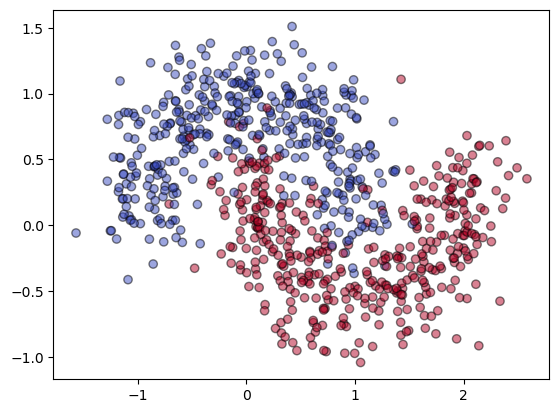

In [3]:
# create random data
X, y = make_moons(n_samples=800, noise=0.25, random_state=0)
print(X.shape, y.shape)

# plot data
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, edgecolors='k', cmap=plt.cm.coolwarm)
plt.show()

In [4]:
#degree = [1, 2, 3, 5, 7, 9, 12]
coeffs = [1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e10] #coeffs and lambda are in an inverse relation
plt.rcParams['figure.figsize'] = [12, 6]
def moon_calssification( degree=3):
    plt.figure()

    for C in coeffs:
        # create logistic regression classifier
        


        plt.subplot(2, 4, coeffs.index(C) + 1)
        plt.tight_layout() # for more readability and arrangment of the subplots
        poly_features = PolynomialFeatures(degree=degree, include_bias=False)
        log_reg = LogisticRegression(C=C)
        model = Pipeline([("poly_features", poly_features), ("logistic_regression", log_reg)])
        
        # train classifier
        model.fit(X, y)
        accuracy = model.score(X, y)
        
        # plot classification results
        plot_2d_separator(model, X, fill=True)
        plt.scatter(X[:, 0], X[:, 1], s=15, c=y, alpha=0.5, edgecolors='k', cmap=plt.cm.coolwarm)
        plt.title("C = {:.2e} ({:.2f}%)".format(C, accuracy * 100), fontsize=10)

    plt.show()

interact(moon_calssification, degree = [1, 2, 3, 5, 7, 9, 12])

interactive(children=(Dropdown(description='degree', index=2, options=(1, 2, 3, 5, 7, 9, 12), value=3), Output…

<function __main__.moon_calssification(degree=3)>

In [5]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()
X, y = faces['data'], faces['target']
print(X.shape, y.shape)

clf = LogisticRegression()
clf.fit(X,y)
print(clf.score(X,y))
print(clf.predict(X[:15,:]))
#clf.predict_proba(X[:20,:])

(400, 4096) (400,)
1.0
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1]


### Testing the effect of PCA_based compression on logistic regression based classification

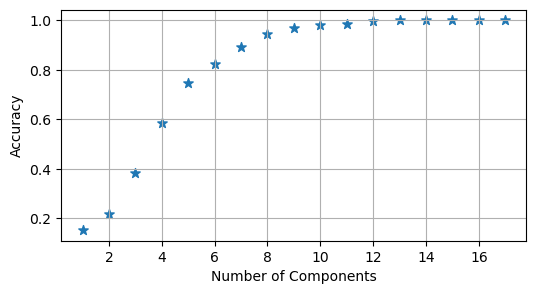

In [6]:
from sklearn.decomposition import PCA
plt.rcParams['figure.figsize'] = [6, 3]

def compress_fit(no_component):
    pca = PCA(no_component)
    pca.fit(X)
    X_t = pca.transform(X)
    clf.fit(X_t,y)
    return clf.score(X_t,y)

no_comp_list = np.linspace(0,4095,4096)
accuracies = np.ones(4096)
more_check = 0
for t in range(1, 4096):
    accuracies[t] = compress_fit(t)
    if accuracies[t] == 1 :
        more_check += 1
        if more_check == 5 :
            plt.scatter(no_comp_list[1:t+1], accuracies[1:t+1], 50, marker='*')
            plt.grid()
            plt.xlabel('Number of Components')
            plt.ylabel('Accuracy')
            plt.show()
            break



### digits dataset

In [7]:
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


(1797, 2)


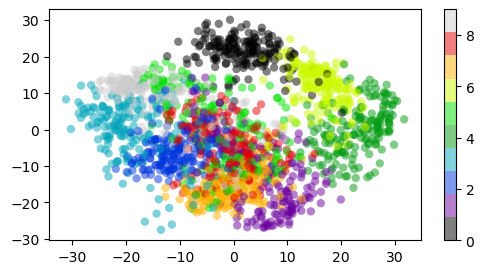

In [8]:
pca_dig = PCA(2)
digit_t = pca_dig.fit_transform(X)
print(digit_t.shape)

plt.scatter(digit_t[:, 0], digit_t[:, 1], c=y, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()

### COefficients, Degrees and Number of Components variation in digits classification

In [9]:
coeffs = [1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8] #coeffs and lambda are in an inverse relation

plt.rcParams['figure.figsize'] = [12, 6]


def digit_calssification( degree = 1):
    
    for C in coeffs:
        accuracy = np.zeros(32)
        com_list = np.zeros(32)
        
        plt.subplot(2, 4, coeffs.index(C) + 1)
        plt.tight_layout() # for more readability and arrangment of the subplots
        poly_features = PolynomialFeatures(degree=degree, include_bias=False)
        log_reg = LogisticRegression(C=C)
        model = Pipeline([("poly_features", poly_features), ("logistic_regression", log_reg)])
        
        # train classifier
        index=0
        more_check = 0
        toppest_acuracy = 0
        for no_com in range(2, 64, 2) :
            pca = PCA(no_com)
            x_transformed = pca.fit_transform(X)
            model.fit(x_transformed, y)
            accuracy[index] = model.score(x_transformed, y)
            com_list[index] = no_com
            if accuracy[index] == 1.0:
                more_check += 1
                if more_check == 5:
                    toppest_acuracy = index
                    break
            index += 1

        
        
        components = com_list[:toppest_acuracy + 1]
        obtain_accuracies = accuracy[:toppest_acuracy + 1]
        print(obtain_accuracies)
        plt.scatter(components, obtain_accuracies, s=50, marker='*')
        plt.title("C = {:.2e} (Features' degree = {:d})".format(C, degree), fontsize=10)
        plt.grid()
        plt.xlabel('Number of Component')
        plt.ylabel('Acuracy')
    plt.show()

    

interact(digit_calssification, degree = [1, 2, 3] )

interactive(children=(Dropdown(description='degree', options=(1, 2, 3), value=1), Output()), _dom_classes=('wi…

<function __main__.digit_calssification(degree=1)>